<a href="https://colab.research.google.com/github/Jit562/Online-Reatil-Cluster/blob/main/Online_Retail_Cluster_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name -** Online Retails Product Cluster Projects.

**Project Type** - Cluster/UnSupervised Learning

**Contribution** - Individual

**Team Member** - 1

**BY-Jitendra Prasad (jitendra.mits2@gmail.com)**

# **Project Summary -** Online Retails Products

This project focuses on analyzing online retail data to uncover insights through clustering techniques. The primary goal is to segment customers into distinct groups based on their purchasing behavior, enabling personalized marketing strategies and improved customer experience.

**Data Collection and Preparation:** The dataset used comprises transaction records from an online retail store. Key features include customer ID, transaction date, item description, quantity, and purchase amount. Data preprocessing involves cleaning the dataset by handling missing values, standardizing formats, and aggregating transactions to derive meaningful features such as total spend and frequency of purchases.

**Exploratory Data Analysis (EDA):** Initial exploration involves visualizing transaction patterns, identifying seasonal trends, and understanding customer demographics. Techniques like correlation analysis and principal component analysis (PCA) help in reducing dimensionality and revealing significant patterns in the data.

**Clustering Analysis:** Several clustering algorithms are applied to segment customers. K-Means clustering is used to group customers into K clusters based on their purchasing behavior, while hierarchical clustering provides a dendrogram to visualize relationships between clusters. DBSCAN is also explored for identifying noise and discovering clusters of varying shapes.

**Model Evaluation**: The effectiveness of the clustering is evaluated using metrics like silhouette score and Davies-Bouldin index. Validation involves examining the stability and interpretability of clusters, and assessing their business relevance.

**Results and Insights:** The project aims to identify distinct customer segments, such as high-value, frequent buyers, or occasional shoppers. Insights gained can drive targeted marketing campaigns, improve inventory management, and enhance customer satisfaction by tailoring offers and communications.

# **GitHub Link -** https://github.com/Jit562/Online-Reatil-Cluster

#**Problem Statement-**

This dataset consists of Description available on Online retails as of 2010 and 2011. The dataset is collected from Flixable which is a third-party online retails search engine.

In 2011, they released an interesting report which shows that the number of Retails on Online has nearly tripled since 2010. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as Online Retails, rotten tomatoes can also provide many interesting findings.

#### **In this project, you are required to do**
1. Exploratory Data Analysis

2. Understanding what type content is available in different countries

3. Is Online retails has increasingly focusing on Discription rather than month in recent years.

4. Clustering similar content by matching text-based features.

## **Attribute Information-**

1. InvoiceNo:-Online retails invoice columns

2. StockCode: products code

3. Description: product descriptions

4. Quantity: Number of quantity

5. InvoiceDate:Date and time

6. UnitPrice:Product Price

7. CustomerID: Consumer Id

8. Country: Country Name

# **General Guidelines : -**


* Well-structured, formatted, and commented code is required.

* Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.

The additional credits will have advantages over other students during Star Student selection.

    [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
              without a single error logged. ]

* Each and every logic should have proper comments.

* You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.

# Chart visualization code
        
* Why did you pick the specific chart?
* What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.
* You have to create at least 15 logical & meaningful charts having important insights.

[ Hints : - Do the Vizualization in a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis ]

* You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.
Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Cross- Validation & Hyperparameter Tuning

* Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

* Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

# **Let's Begin !**


**1. Know Your Data**

**Import Libraries**

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [14]:
# import the dependancy
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm
import scipy.cluster.hierarchy as sch
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import cosine_similarity
import difflib

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### **Dataset Loading**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Project Tech Mind/ML_Project/Online-Retail-Classification/Online Retail.xlsx - Online Retail.csv')

### **Dataset First View**

In [ ]:
#Check top 5 data
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [ ]:
#Below 5 data check
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/11 12:50,4.95,12680.0,France


In [ ]:
# Random check data
df.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
274481,560918,23053,RECYCLED ACAPULCO MAT PINK,2,7/21/11 18:27,8.25,14849.0,United Kingdom
273691,C560855,21205,MULTICOLOUR 3D BALLS GARLAND,-1,7/21/11 13:00,2.55,14410.0,United Kingdom
267615,560356,23203,JUMBO BAG DOILEY PATTERNS,10,7/18/11 11:41,1.95,16875.0,United Kingdom
472456,576688,23355,HOT WATER BOTTLE KEEP CALM,4,11/16/11 12:16,4.95,16717.0,United Kingdom
34166,539321,22411,JUMBO SHOPPER VINTAGE RED PAISLEY,1,12/16/10 19:19,1.95,14723.0,United Kingdom


### **Missing Values/Null Values**

In [ ]:
#Check null values
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


#### Description and CustomerID have null values.

In [ ]:
#null value in percentage
for col in df.columns:
  print(f"{col} : Count : {df[col].isnull().sum()} : Percentage : {round(df[col].isnull().sum()/df.shape[0]*100, 2)}")


InvoiceNo : Count : 0 : Percentage : 0.0
StockCode : Count : 0 : Percentage : 0.0
Description : Count : 1454 : Percentage : 0.27
Quantity : Count : 0 : Percentage : 0.0
InvoiceDate : Count : 0 : Percentage : 0.0
UnitPrice : Count : 0 : Percentage : 0.0
CustomerID : Count : 135080 : Percentage : 24.93
Country : Count : 0 : Percentage : 0.0


InvoiceNo : Count : 0 : Percentage : 0.0

StockCode : Count : 0 : Percentage : 0.0

Description : Count : 1454 : Percentage : 0.27

Quantity : Count : 0 : Percentage : 0.0

InvoiceDate : Count : 0 : Percentage : 0.0

UnitPrice : Count : 0 : Percentage : 0.0

CustomerID : Count : 135080 : Percentage : 24.93

Country : Count : 0 : Percentage : 0.0

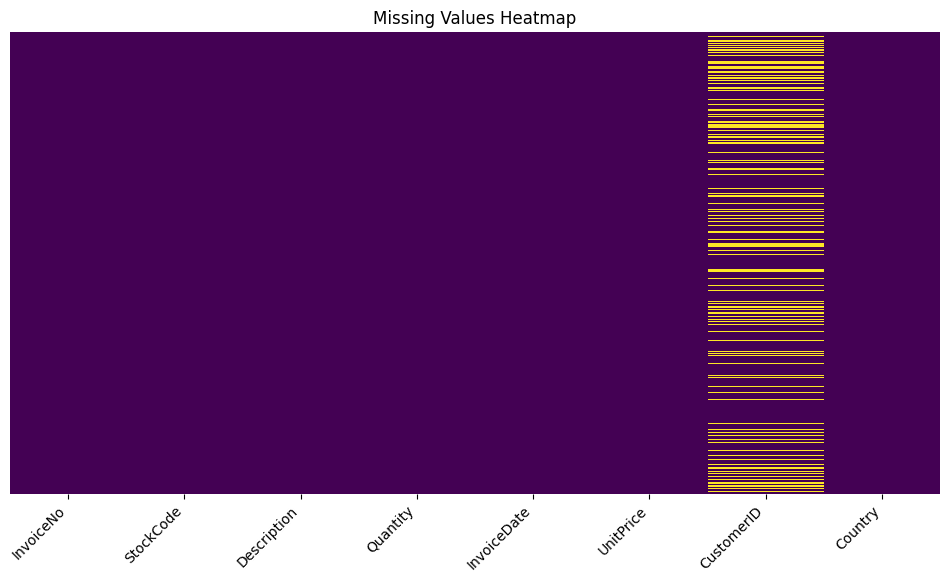

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.title('Missing Values Heatmap')
plt.show()

#### **Duplicate Values**

In [ ]:
#Check Duplicated
df.duplicated().sum()

5268

#### 5268 data have duplicated

In [ ]:
## Remove Duplicated
df.drop_duplicates(inplace=True)

In [ ]:
### After Remove duplicate check
df.duplicated().sum()

0

### **Dataset Rows & Columns count**

In [ ]:
### Check columns and row i this dataset
df.shape

(536641, 8)

####  **Understanding Your Variables**

In [ ]:
### Check columns name
for col in df.columns:
  print(col)

InvoiceNo
StockCode
Description
Quantity
InvoiceDate
UnitPrice
CustomerID
Country


#### **Column Details**

**InvoiceNo:**-Online retails invoice columns

**StockCode:** products code

**Description:** product descriptions

**Quantity:** Number of quantity

**InvoiceDate:**Date and time

**UnitPrice:**Product Price

**CustomerID:** Consumer Id

**Country:** Country Name

1. 536641 data have rows
2. 8 data have columns

In [ ]:
### Remove null value
df['Description'].fillna('No Description', inplace=True)

In [ ]:
#null value in percentage
for col in df.columns:
  print(f"{col} : Count : {df[col].isnull().sum()} : Percentage : {round(df[col].isnull().sum()/df.shape[0]*100, 2)}")

InvoiceNo : Count : 0 : Percentage : 0.0
StockCode : Count : 0 : Percentage : 0.0
Description : Count : 0 : Percentage : 0.0
Quantity : Count : 0 : Percentage : 0.0
InvoiceDate : Count : 0 : Percentage : 0.0
UnitPrice : Count : 0 : Percentage : 0.0
CustomerID : Count : 135037 : Percentage : 25.16
Country : Count : 0 : Percentage : 0.0


In [ ]:
### Remove customerid
df.drop('CustomerID', axis=1, inplace=True)

### **Dataset Information**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 536641 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    536641 non-null  object 
 1   StockCode    536641 non-null  object 
 2   Description  536641 non-null  object 
 3   Quantity     536641 non-null  int64  
 4   InvoiceDate  536641 non-null  object 
 5   UnitPrice    536641 non-null  float64
 6   Country      536641 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 32.8+ MB


In [ ]:
#Check all data describe
df.describe()

,Quantity,UnitPrice
count,536641.000000,536641.000000
mean,9.620029,4.632656
std,219.130156,97.233118
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


In [ ]:
#Change datetime formate
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [ ]:
#After change date time check
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 536641 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    536641 non-null  object        
 1   StockCode    536641 non-null  object        
 2   Description  536641 non-null  object        
 3   Quantity     536641 non-null  int64         
 4   InvoiceDate  536641 non-null  datetime64[ns]
 5   UnitPrice    536641 non-null  float64       
 6   Country      536641 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 32.8+ MB


In [ ]:
## Conveert Invoice data in year, month, week, day, quarter
df['year'] = df['InvoiceDate'].dt.year
df['month'] = df['InvoiceDate'].dt.month
df['month_name'] = df['InvoiceDate'].dt.month_name()
df['week_name'] = df['InvoiceDate'].dt.day_name()
df['quarter'] = df['InvoiceDate'].dt.quarter
df['days'] = df['InvoiceDate'].dt.day
df['week'] = df['InvoiceDate'].dt.weekday
df['hour'] = df['InvoiceDate'].dt.hour
df['minute'] = df['InvoiceDate'].dt.minute
df['second'] = df['InvoiceDate'].dt.second

In [ ]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'Country', 'year', 'month', 'month_name', 'week_name',
       'quarter', 'days', 'week', 'hour', 'minute', 'second'],
      dtype='object')

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,year,month,month_name,week_name,quarter,days,week,hour,minute,second
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,2010,12,December,Wednesday,4,1,2,8,26,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,2010,12,December,Wednesday,4,1,2,8,26,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,2010,12,December,Wednesday,4,1,2,8,26,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,2010,12,December,Wednesday,4,1,2,8,26,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,2010,12,December,Wednesday,4,1,2,8,26,0


In [ ]:
## Extract the columns
column = ['Country','Description', 'Quantity', 'UnitPrice', 'year', 'month', 'month_name', 'week_name', 'quarter', 'days', 'week', 'hour','minute']
new_df = df[column]
new_df.head()

,Country,Description,Quantity,UnitPrice,year,month,month_name,week_name,quarter,days,week,hour,minute
0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,2010,12,December,Wednesday,4,1,2,8,26
1,United Kingdom,WHITE METAL LANTERN,6,3.39,2010,12,December,Wednesday,4,1,2,8,26
2,United Kingdom,CREAM CUPID HEARTS COAT HANGER,8,2.75,2010,12,December,Wednesday,4,1,2,8,26
3,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,2010,12,December,Wednesday,4,1,2,8,26
4,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,2010,12,December,Wednesday,4,1,2,8,26


In [ ]:
# Check the data
new_df.shape

(536641, 13)

In [ ]:
new_df.describe()

,Quantity,UnitPrice,year,month,quarter,days,week,hour,minute
count,536641.000000,536641.000000,536641.000000,536641.000000,536641.000000,536641.000000,536641.000000,536641.000000,536641.000000
mean,9.620029,4.632656,2010.921771,7.544820,2.831938,15.024640,2.423889,13.077154,30.006584
std,219.130156,97.233118,0.268532,3.508696,1.136995,8.663351,1.839870,2.447505,16.969535
min,-80995.000000,-11062.060000,2010.000000,1.000000,1.000000,1.000000,0.000000,6.000000,0.000000
25%,1.000000,1.250000,2011.000000,5.000000,2.000000,7.000000,1.000000,11.000000,16.000000
50%,3.000000,2.080000,2011.000000,8.000000,3.000000,15.000000,2.000000,13.000000,30.000000
75%,10.000000,4.130000,2011.000000,11.000000,4.000000,22.000000,4.000000,15.000000,44.000000
max,80995.000000,38970.000000,2011.000000,12.000000,4.000000,31.000000,6.000000,20.000000,59.000000


### **find Unique Values for each variable.**

In [ ]:
## Check Unique number for all columns
for col in new_df.columns:
  print(f"Number of Unique  : {col} : {new_df[col].nunique()}")

Number of Unique  : Country : 38
Number of Unique  : Description : 4224
Number of Unique  : Quantity : 722
Number of Unique  : UnitPrice : 1630
Number of Unique  : year : 2
Number of Unique  : month : 12
Number of Unique  : month_name : 12
Number of Unique  : week_name : 6
Number of Unique  : quarter : 4
Number of Unique  : days : 31
Number of Unique  : week : 6
Number of Unique  : hour : 15
Number of Unique  : minute : 60


Number of Unique  : Country : 38

Number of Unique  : Description : 4224

Number of Unique  : Quantity : 722

Number of Unique  : UnitPrice : 1630

Number of Unique  : year : 2

Number of Unique  : month : 12

Number of Unique  : month_name : 12

Number of Unique  : week_name : 6

Number of Unique  : quarter : 4

Number of Unique  : days : 31

Number of Unique  : week : 6

Number of Unique  : hour : 15

Number of Unique  : minute : 60

## **Data Wrangling**

###### Data Wrangling Code

In [ ]:
#Year Distributions
new_df['year'].value_counts()

,count
year,
2011,494660
2010,41981


##### There are two years data available in the dataset

* 2011 and 2010
* 2011 in the data available 494660
* 2010 in the data available 41981

In [ ]:
#Month Distribution
new_df['month'].value_counts().reset_index().sort_values(by='month')

,month,count
9,1,34900
11,2,27479
7,3,36439
10,4,29701
5,5,36782
6,6,36609
4,7,39267
8,8,35064
3,9,49861
2,10,59969


###### All Month data available
* highest in the month of Nomber and lowest is Febroury

In [ ]:
# Check the minimum month data
new_df['month'].value_counts().min()

27479

In [ ]:
# check the maximum month data
new_df['month'].value_counts().max()

83343

In [ ]:
new_df['month_name'].value_counts().reset_index()

,month_name,count
0,November,83343
1,December,67227
2,October,59969
3,September,49861
4,July,39267
5,May,36782
6,June,36609
7,March,36439
8,August,35064
9,January,34900


In [ ]:
#Minimum month data
new_df['month_name'].value_counts().min()

27479

In [ ]:
# Maximum month data
new_df['month_name'].value_counts().max()

83343

In [ ]:
#Find the week data
new_df['week_name'].value_counts().reset_index()

,week_name,count
0,Thursday,103056
1,Tuesday,101064
2,Monday,94435
3,Wednesday,93715
4,Friday,81565
5,Sunday,62806


* Thursday have highest data and Sunday lowest data

In [ ]:
#Check the Quarter
new_df['quarter'].value_counts().reset_index()

,quarter,count
0,4,210539
1,3,124192
2,2,103092
3,1,98818


* 4th Quarter have highest data ( 210539 )
* 1st quarter have lowest data ( 98818 )


In [ ]:
#Check the Hourly data
new_df['hour'].value_counts().reset_index().sort_values(by='hour')

,hour,count
14,6,41
13,7,383
9,8,8906
7,9,34314
6,10,48808
4,11,56949
0,12,77573
2,13,71247
3,14,66572
1,15,76938


* 12,13 and 15 hours data have highest
* 6 and 7 hours data have lowest

In [ ]:
#Nomber of quntity product
new_df['Quantity'].value_counts().reset_index().head(10)

,Quantity,count
0,1,144495
1,2,81245
2,12,60858
3,6,40656
4,4,38393
5,3,36990
6,24,23961
7,10,22235
8,8,13079
9,5,11707


### Highset quantity 24 and lowest quantity have 1 in the dataset.

In [ ]:
new_df['Quantity'].min()

-80995

In [ ]:
new_df['Quantity'].max()

80995

In [ ]:
# Check the Unit Price
new_df['UnitPrice'].value_counts().reset_index().head(10)

,UnitPrice,count
0,1.25,49750
1,1.65,37627
2,0.85,28182
3,2.95,27350
4,0.42,24277
5,4.95,18827
6,3.75,18357
7,2.10,17397
8,2.46,17091
9,0.83,16894


In [ ]:
#Check the Country available in the data
country = new_df['Country'].value_counts().reset_index()
country.columns = ['Country','count']
country

,Country,count
0,United Kingdom,490300
1,Germany,9480
2,France,8541
3,EIRE,8184
4,Spain,2528
5,Netherlands,2371
6,Belgium,2069
7,Switzerland,1994
8,Portugal,1510
9,Australia,1258


#### 38 Country data have available in the dataset
* Unitedt kingdom have highest dataset
* saudi arabia have lowest dataset

In [ ]:
## Country vs description analysis
new_df.groupby('Country')['Description'].value_counts().reset_index().sample(10)

,Country,Description,count
2492,Cyprus,SET 10 NIGHT OWL LIGHTS,1
16437,United Kingdom,SET OF 6 T-LIGHTS TOADSTOOLS,187
4465,EIRE,ZINC WIRE SWEETHEART LETTER TRAY,1
19021,United Kingdom,??,7
10872,Netherlands,MINIATURE ANTIQUE ROSE HOOK IVORY,2
429,Australia,POTTERING MUG,1
11831,Norway,VICTORIAN GLASS HANGING T-LIGHT,1
14624,Switzerland,VINTAGE CREAM CAT FOOD CONTAINER,3
16350,United Kingdom,MAGNETS PACK OF 4 SWALLOWS,208
9359,Israel,DOLLY GIRL CHILDRENS CUP,2


In [ ]:
#Year by country
new_df.groupby('year')['Country'].value_counts().reset_index().head(10)

,year,Country,count
0,2010,United Kingdom,39628
1,2010,Germany,564
2,2010,France,439
3,2010,EIRE,403
4,2010,Norway,147
5,2010,Portugal,120
6,2010,Belgium,95
7,2010,Cyprus,82
8,2010,Spain,75
9,2010,Netherlands,72


In [ ]:
#Top 10 country data by month
new_df.groupby('Country')['month'].value_counts().reset_index().head(10)

,Country,month,count
0,Australia,7,217
1,Australia,6,171
2,Australia,1,127
3,Australia,5,118
4,Australia,10,114
5,Australia,3,110
6,Australia,8,107
7,Australia,9,104
8,Australia,2,91
9,Australia,11,45


In [ ]:
#Top 10 Quantity data by month
new_df.groupby('Quantity')['month_name'].value_counts().reset_index().head(10)

,Quantity,month_name,count
0,-80995,December,1
1,-74215,January,1
2,-9600,June,2
3,-9360,December,1
4,-9058,June,1
5,-5368,March,1
6,-4830,October,1
7,-3667,September,1
8,-3167,September,1
9,-3114,April,1


In [ ]:
#Top 10 Country data by days
new_df.groupby('Country')['week_name'].value_counts().reset_index().head(10)

,Country,week_name,count
0,Australia,Thursday,394
1,Australia,Tuesday,331
2,Australia,Wednesday,322
3,Australia,Friday,101
4,Australia,Monday,58
5,Australia,Sunday,52
6,Austria,Monday,136
7,Austria,Tuesday,108
8,Austria,Thursday,54
9,Austria,Friday,44


In [ ]:
# Top 10 country data by Quarter
new_df.groupby('Country')['quarter'].value_counts().reset_index().head(10)

,Country,quarter,count
0,Australia,3,428
1,Australia,1,328
2,Australia,2,309
3,Australia,4,193
4,Austria,3,143
5,Austria,4,140
6,Austria,2,79
7,Austria,1,39
8,Bahrain,2,17
9,Bahrain,4,1


In [ ]:
#Top 10 Year data by Unitprice
new_df.groupby('year')['UnitPrice'].value_counts().reset_index().head(10)

,year,UnitPrice,count
0,2010,1.25,3361
1,2010,0.85,3125
2,2010,2.95,2565
3,2010,1.65,2074
4,2010,2.51,2058
5,2010,2.10,1927
6,2010,4.21,1806
7,2010,3.75,1797
8,2010,1.66,1605
9,2010,3.36,1579


In [ ]:
#year vs month and week data
new_df.groupby(['month','week'])['year'].sum().unstack()

week,0,1,2,3,4,6
month,,,,,,
1,15086522,11454656,12502387,12709520,11862889,6567926
2,11028324,11472755,10113319,9572360,8052044,5021467
3,11619558,17270468,11927241,15758196,9628668,7074698
4,12351562,12307320,9011291,12510431,8365760,5182347
5,10065055,18002472,11090665,13463645,11553195,9793570
6,11830713,12162528,15742108,17131709,7873065,8880576
7,15818526,13676811,13399293,13598382,12438035,10034890
8,9783515,16494222,15541008,13441524,8645289,6608146
9,12528530,14372617,19022049,21302523,20009450,13035302


In [ ]:
#Quantity vs year and month data set
new_df.groupby(['year','month'])['Quantity'].sum().unstack()

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,341038.0
2011,308281.0,277374.0,351165.0,288237.0,379652.0,340945.0,389051.0,405450.0,548669.0,569749.0,737182.0,225709.0


In [ ]:
#Quantity vs week and month data
new_df.groupby(['week','month'])['Quantity'].sum().unstack()

month,1,2,3,4,5,6,7,8,9,10,11,12
week,,,,,,,,,,,,
0,46725,53355,53646,48754,43821,43875,60420,48493,84135,106241,125896,97817
1,60379,69439,75177,59424,83534,32044,75281,67700,116601,93713,138412,89429
2,56442,46027,56308,62418,62529,88799,66018,89488,70487,101197,157230,110279
3,52200,54609,88958,59117,87329,97719,85147,124373,132401,121871,126167,135709
4,71895,39204,51002,39254,66465,37177,47255,52426,85107,96321,116185,90815
6,20640,14740,26074,19270,35974,41331,54930,22970,59938,50406,73292,42698


In [ ]:
#Quantity vs Quarter and month dataset
new_df.groupby(['quarter','month'])['Quantity'].sum().unstack()

month,1,2,3,4,5,6,7,8,9,10,11,12
quarter,,,,,,,,,,,,
1,308281.0,277374.0,351165.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,288237.0,379652.0,340945.0,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,389051.0,405450.0,548669.0,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,569749.0,737182.0,566747.0


In [ ]:
#Quantity vs Quarter and year data
new_df.groupby(['quarter','year'])['Quantity'].sum().unstack()

year,2010,2011
quarter,,
1,NaN,936820.0
2,NaN,1008834.0
3,NaN,1343170.0
4,341038.0,1532640.0


In [ ]:
#Hourly dataset
new_df.groupby('hour')['Quantity'].sum().reset_index()

,hour,Quantity
0,6,-86
1,7,15361
2,8,157715
3,9,429254
4,10,683519
5,11,635974
6,12,821059
7,13,674272
8,14,569420
9,15,608135


## Chart-1

#### Pie Plot Show in Percentage form data

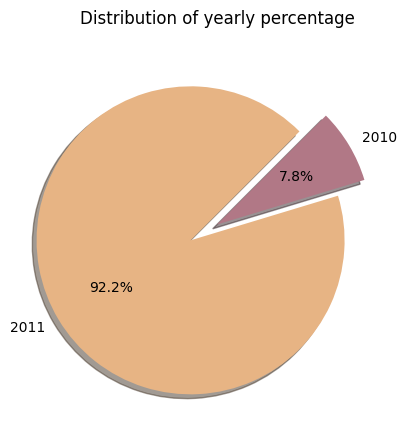

In [ ]:
#set values
pia = new_df['year'].value_counts().reset_index()

#Set the columns
pia.columns = ['year','count']

#Set the 3d
explode = [0.2,0]

#Set the color
colors = ['#E7B484','#B17886']

#Set Figure size
plt.figure(figsize=(5, 5))

## Create Pie chart
plt.pie(pia['count'], labels=pia['year'], autopct='%1.1f%%', explode=explode, shadow=True, startangle=45,colors=colors)

#Set Title
plt.title('Distribution of yearly percentage')

#show the chart
plt.show()

* Distribution of yearly percentage
* 92% data in 2011
* 8% data in 2010

## Chart-2

### Bar Plot Online retails by Month

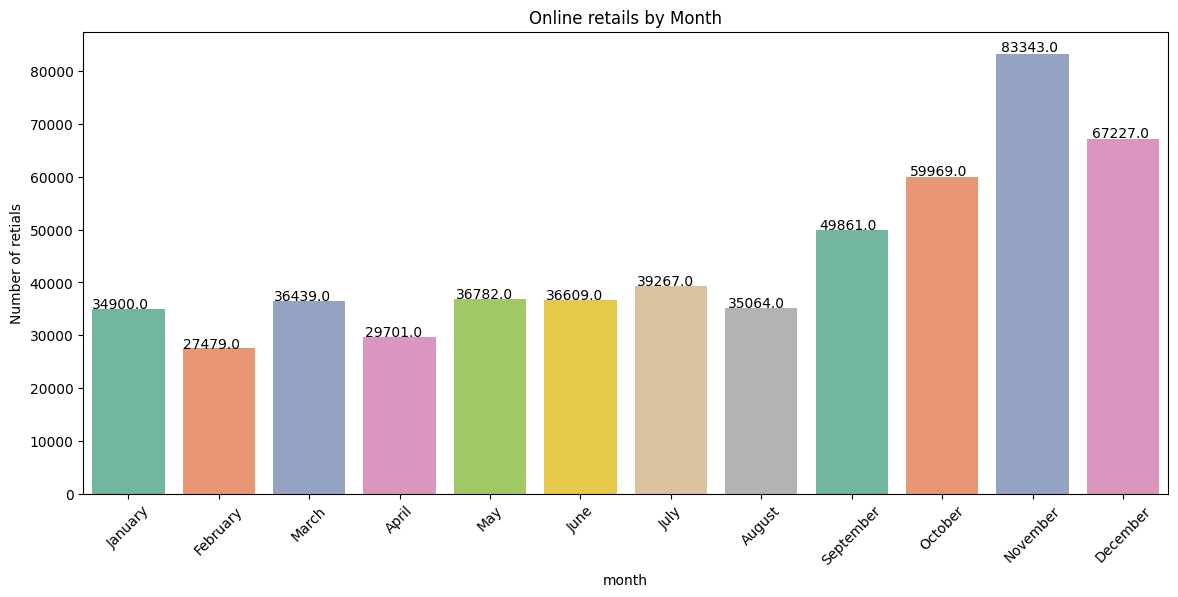

In [ ]:
data = new_df['month_name'].value_counts().reset_index()
data.columns = ['month_name','count']

# Sort the DataFrame by month order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
data['month_name'] = pd.Categorical(data['month_name'], categories=month_order, ordered=True)
data = data.sort_values('month_name')

# Create the bar plot
plt.figure(figsize=(14, 6))
ax = sns.barplot(x='month_name', y='count', data=data, palette='Set2')

# Add labels to each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

# Customize the plot
plt.title('Online retails by Month')
plt.xlabel('month')
plt.ylabel('Number of retials')
plt.xticks(rotation=45)
plt.show()

* Online retails by Month
* Highest retail shale in month of November and December
* Lowest shale in month of January to August


## Chart-3

### Line Chart Week Name Frequency Trend

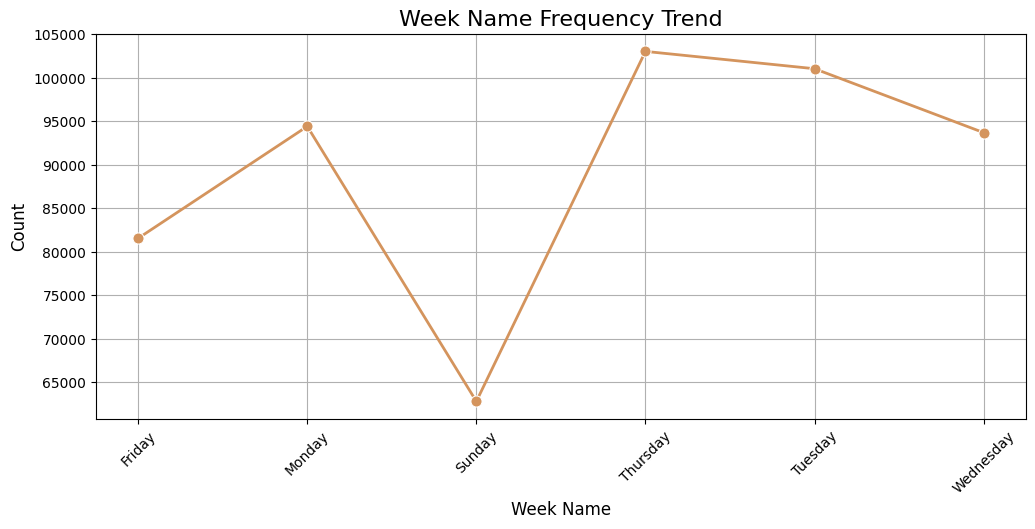

In [ ]:
# Assuming new_df['week_name'].value_counts().reset_index() has been computed
week_name_counts = new_df['week_name'].value_counts().reset_index()
week_name_counts.columns = ['week_name', 'count']  # Renaming the columns for clarity

# Sorting the data by 'week_name' if there's an expected order (e.g., Monday-Sunday)
# If week_name is in sequential order, like Monday, Tuesday, etc., sort appropriately.
week_name_counts = week_name_counts.sort_values('week_name')

# Plotting
plt.figure(figsize=(12,5))
sns.lineplot(x='week_name', y='count', data=week_name_counts, marker='o', linewidth=2, markersize=8,color='#D4945D')

# Customizing the plot
plt.title('Week Name Frequency Trend', fontsize=16)
plt.xlabel('Week Name', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)  # Rotating week names for better readability
plt.grid(True)
# Display the plot
plt.show()


* Week Name Frequency Trend
* Thursday and Tuesday are highest shale
* Wednesday , Monday and Friday are Average shale
* Sunady is lowest shale

## Chart-4

### Pie Plot Online retails by Quarter

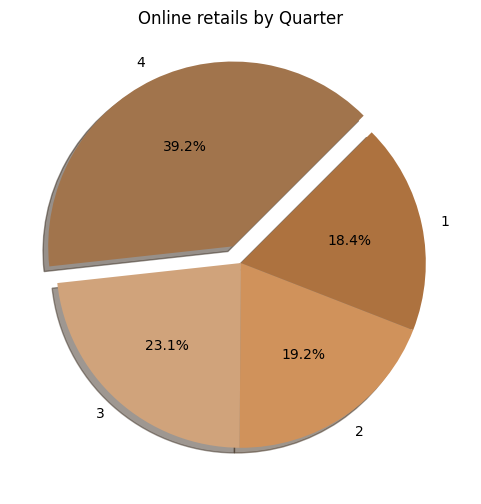

In [ ]:
#Create the data
data = new_df['quarter'].value_counts().reset_index()
data.columns = ['quarter','count']

#Set the 3d
explode = [0.1,0,0,0]

#set color
colors = ['#A1744C','#D0A37B','#D0925B','#AD723F']

#set Figure size
plt.figure(figsize=(6, 6))

#Create the Pie Chart
plt.pie(data['count'], labels=data['quarter'], autopct='%1.1f%%', shadow=True, startangle=45, explode=explode, colors=colors)

#Set the title
plt.title('Online retails by Quarter')

#Show the chart
plt.show()

##### Online retails by Quarter

* 4th Quarter have highest shale
* 1st Quarter have lowest shale
* 2nd and 3rd have Average shale

### Chart-5

##### Line Plot Frequency of Hours in Dataset

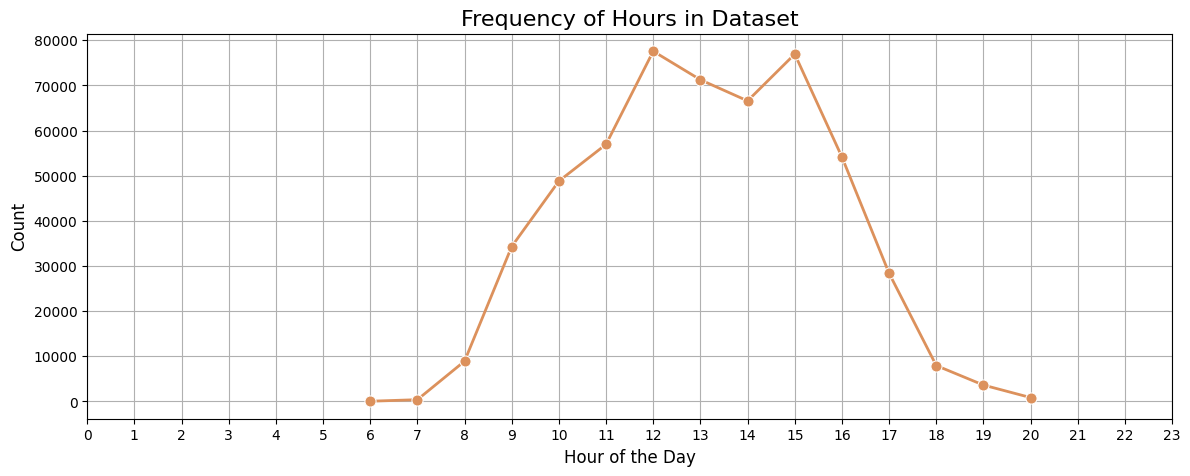

In [ ]:
# Assuming new_df['hour'].value_counts().reset_index() has been computed
hour_counts = new_df['hour'].value_counts().reset_index()
hour_counts.columns = ['hour', 'count']  # Renaming the columns for clarity

# Sorting the values by 'hour'
hour_counts = hour_counts.sort_values(by='hour')

# Plotting the line chart
plt.figure(figsize=(14,5))
sns.lineplot(x='hour', y='count', data=hour_counts, marker='o', linewidth=2, markersize=8, color='#DC915C')

# Customizing the plot
plt.title('Frequency of Hours in Dataset', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(0, 24), fontsize=10)  # Adjust x-axis to cover all 24 hours
plt.grid(True)

# Display the plot
plt.show()

###### Frequency of Hours in Dataset

* 12 to 15 hours data have highest product shaling.
* 0 to 6  and 20 to 23 hours data have zero product shaling.

### Chart-6

* Bar Plot Top 10 Most Frequent Unit Prices vs Top 10 Most Frequent Quantities

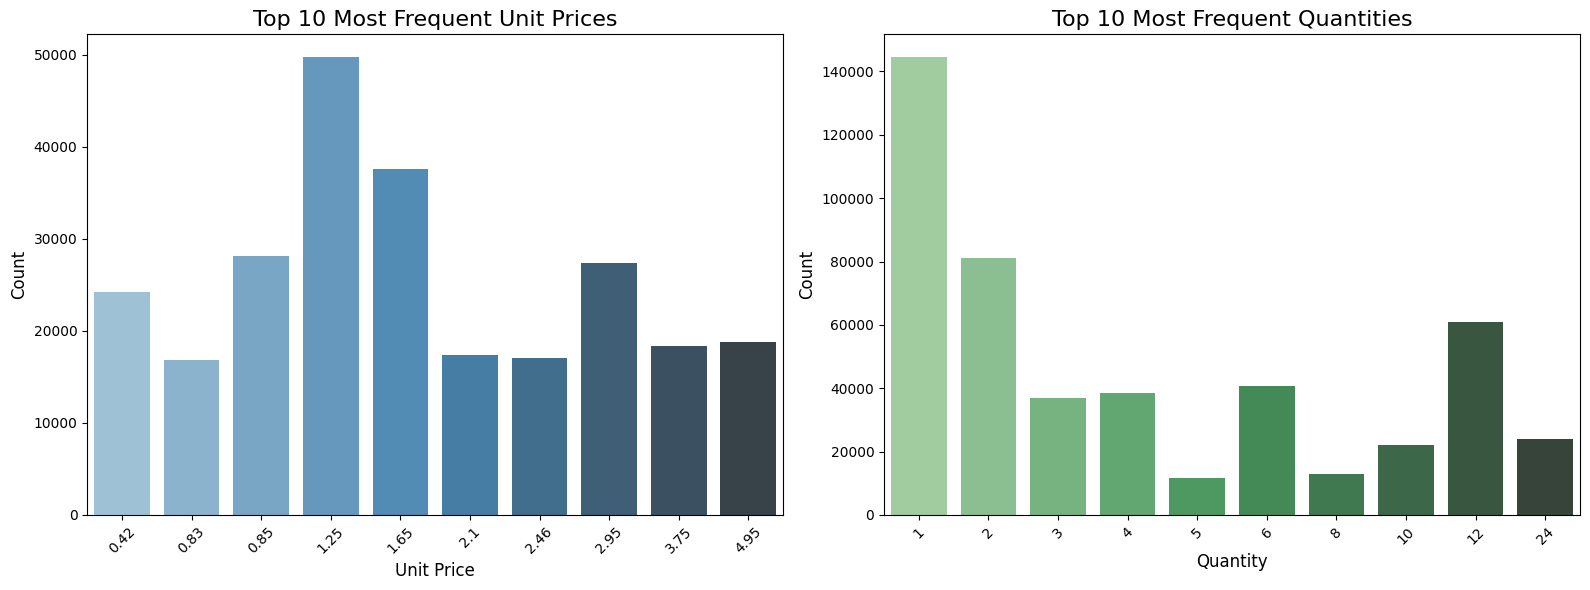

In [ ]:
# Assuming new_df['UnitPrice'].value_counts().reset_index() and new_df['Quantity'].value_counts().reset_index() have been computed
top_unitprice = new_df['UnitPrice'].value_counts().reset_index().head(10)
top_unitprice.columns = ['UnitPrice', 'count']

top_quantity = new_df['Quantity'].value_counts().reset_index().head(10)
top_quantity.columns = ['Quantity', 'count']

# Create a figure with 2 subplots
plt.figure(figsize=(16, 6))

# Plot for UnitPrice
plt.subplot(1, 2, 1)
sns.barplot(x='UnitPrice', y='count', data=top_unitprice, palette='Blues_d')
plt.title('Top 10 Most Frequent Unit Prices', fontsize=16)
plt.xlabel('Unit Price', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)

# Plot for Quantity
plt.subplot(1, 2, 2)
sns.barplot(x='Quantity', y='count', data=top_quantity, palette='Greens_d')
plt.title('Top 10 Most Frequent Quantities', fontsize=16)
plt.xlabel('Quantity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


##### Top 10 Most Frequent Unit Prices vs Top 10 Most Frequent Quantities

* Unit_Price:- 1.25 to 1.65 have highest dataset
* Unit_Price:- 0.83, 2.1 ,2.46,3.75,4.95 have lowest dataset
* Quantity:- 1 Quantity have highest shaling and 3,4,5,10 and 8 have lowest dataset.

### Chart-7

* Barplot

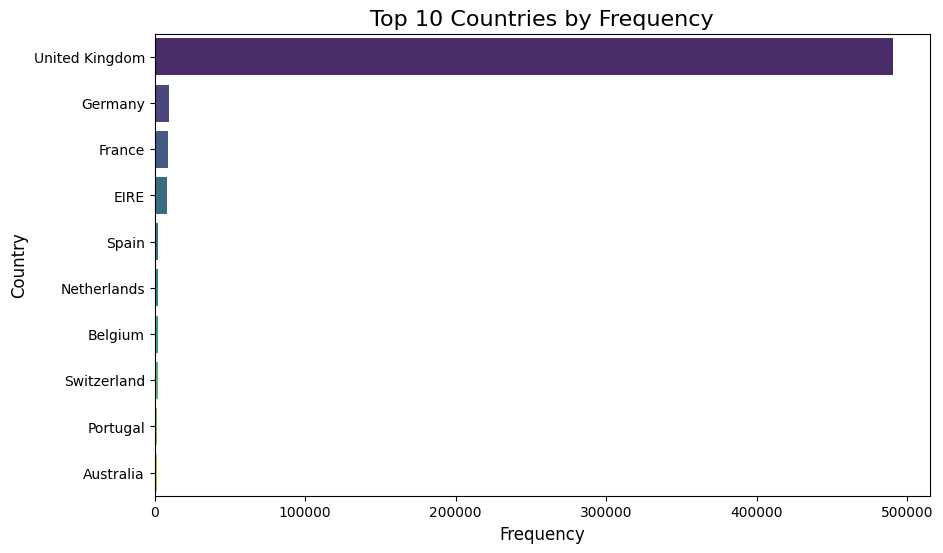

In [ ]:
# Compute the top 10 most frequent countries
top_countries = new_df['Country'].value_counts().reset_index().head(10)
# Rename columns for better clarity
top_countries.columns = ['Country', 'Frequency']

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the horizontal bar chart
sns.barplot(x='Frequency', y='Country', data=top_countries, palette='viridis')

# Add chart title and labels
plt.title('Top 10 Countries by Frequency', fontsize=16)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Country', fontsize=12)

# Show the plot
plt.show()

### Chart-8

* Heatmap Year vs UnitPrice

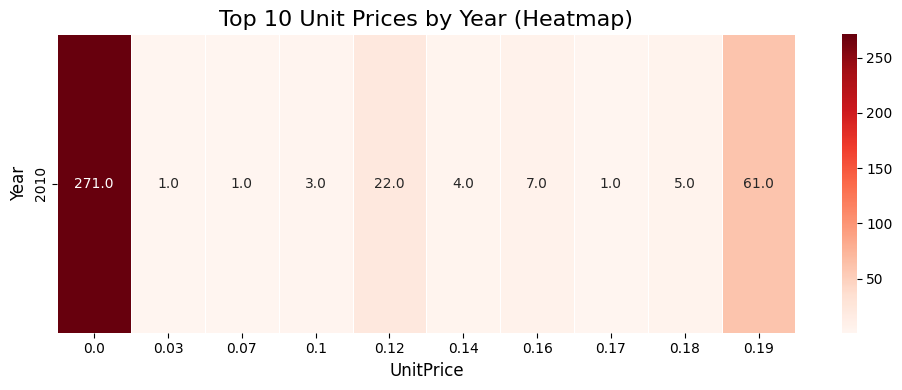

In [ ]:
# Group the data by 'year' and 'UnitPrice', then get the top 10
grouped_data = new_df.groupby(['year', 'UnitPrice']).size().reset_index(name='Count').head(10)

# Pivot the data for the heatmap
heatmap_data = grouped_data.pivot(index='year', columns='UnitPrice', values='Count').fillna(0)

# Set the figure size
plt.figure(figsize=(10, 4))

# Create a heatmap
sns.heatmap(heatmap_data, cmap='Reds', annot=True, fmt=".1f", linewidths=0.5)

# Add chart title and labels
plt.title('Top 10 Unit Prices by Year (Heatmap)', fontsize=16)
plt.xlabel('UnitPrice', fontsize=12)
plt.ylabel('Year', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


* This chart will help show how the top 10 UnitPrice values are distributed across different years.

### Chart-9
* Year vs mont and week

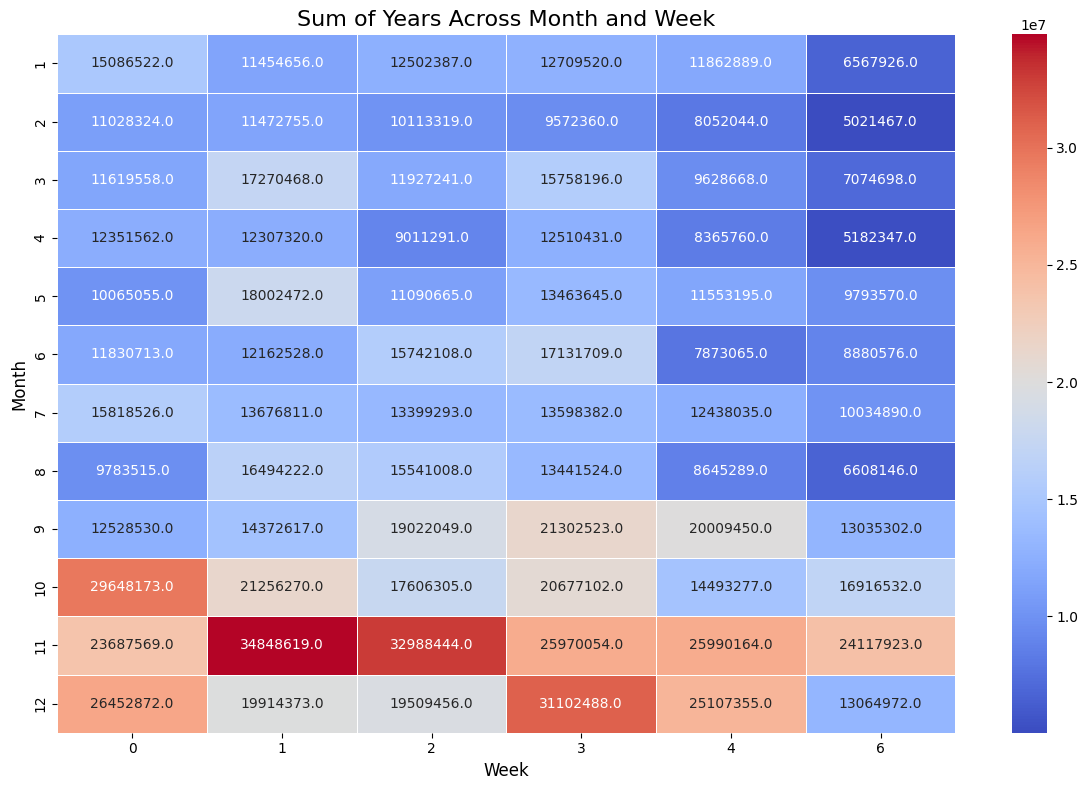

In [ ]:
# Group the data by 'month' and 'week', and sum the 'year'
grouped_data = new_df.groupby(['month', 'week'])['year'].sum().unstack()

# Set the figure size
plt.figure(figsize=(12, 8))

# Create a heatmap
sns.heatmap(grouped_data, cmap='coolwarm', annot=True, fmt=".1f", linewidths=0.5)

# Add chart title and labels
plt.title('Sum of Years Across Month and Week', fontsize=16)
plt.xlabel('Week', fontsize=12)
plt.ylabel('Month', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


* Heatmap: The heatmap represents the intensity of the summed years using color.
* Heatmap: Best for quickly spotting month-to-month differences across years.

### Chart-10

* Line Plot Year vs month Quantity

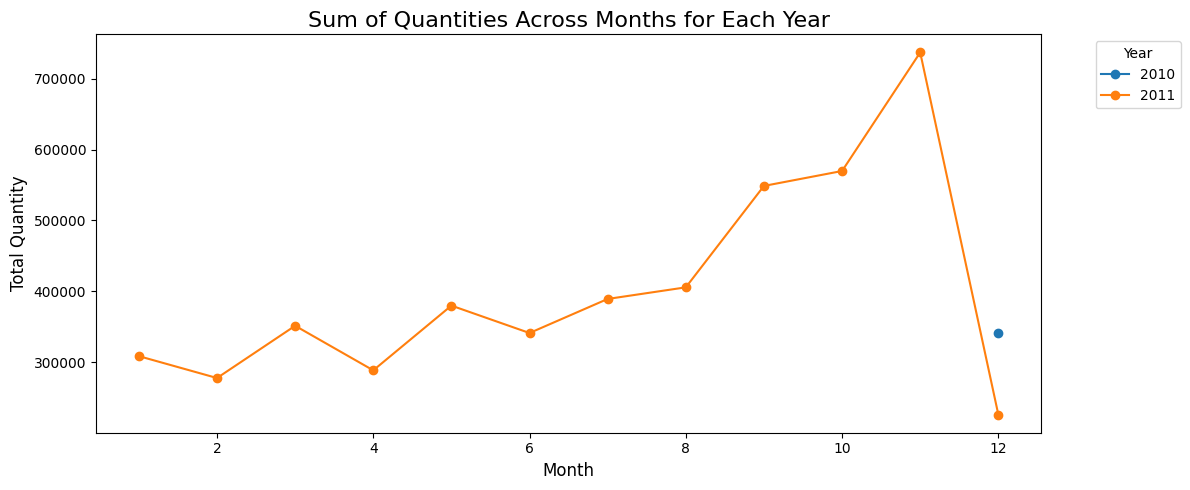

In [ ]:
# Group the data by 'year' and 'month', and sum the 'Quantity'
grouped_data = new_df.groupby(['year', 'month'])['Quantity'].sum().unstack()

# Plot multiple lines, one for each year
grouped_data.T.plot(kind='line', marker='o', figsize=(12, 5))

# Add chart title and labels
plt.title('Sum of Quantities Across Months for Each Year', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Quantity', fontsize=12)

# Show the legend (years) and plot
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Chart-11

* BarPlot Quantity vs Quarter and month

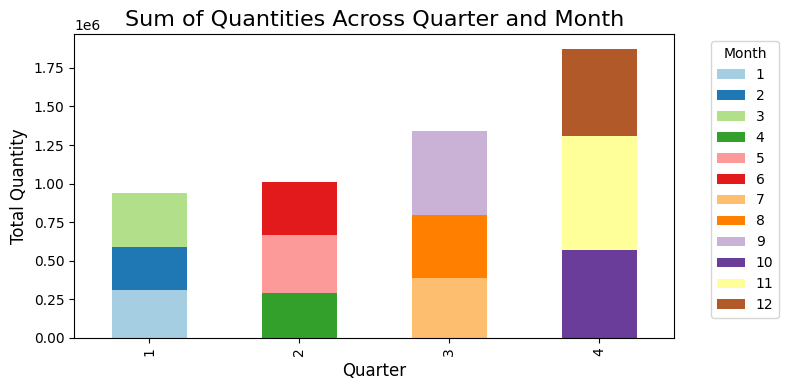

In [ ]:
# Group the data by 'quarter' and 'month', and sum the 'Quantity'
grouped_data = new_df.groupby(['quarter', 'month'])['Quantity'].sum().unstack()

# Plot a stacked bar chart
grouped_data.plot(kind='bar', stacked=True, figsize=(8, 4), colormap='Paired')

# Add chart title and labels
plt.title('Sum of Quantities Across Quarter and Month', fontsize=16)
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Total Quantity', fontsize=12)

# Show the legend and plot
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

*  Stacked Bar Chart: Each bar represents the sum of Quantity for a quarter, with the bar segments showing the distribution of quantities across different months.

*  Stacked Bar Chart: Better for visualizing the exact distribution of Quantity across months within each quarter.

### Chart-12
* Quantity vs week na d month

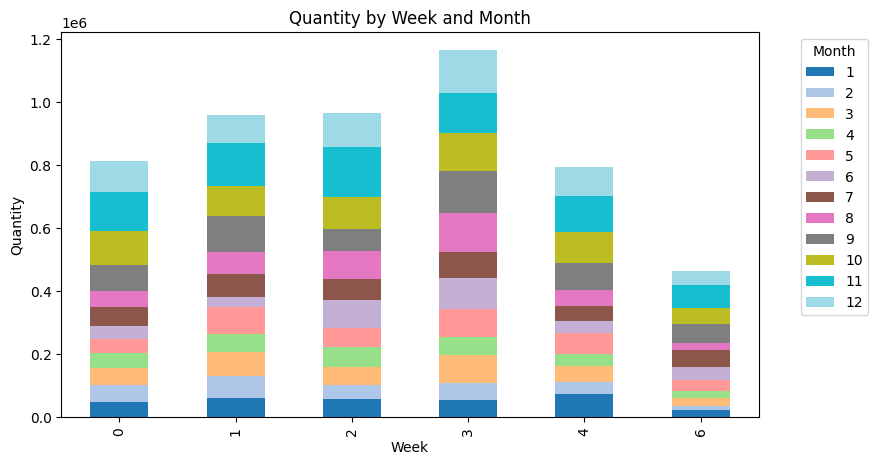

In [ ]:
# Prepare data
stacked_data = new_df.groupby(['week', 'month'])['Quantity'].sum().unstack()

# Plot
ax = stacked_data.plot(kind='bar', stacked=True, figsize=(9, 5), colormap='tab20')
plt.title('Quantity by Week and Month')
plt.xlabel('Week')
plt.ylabel('Quantity')
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

* A stacked bar chart shows the quantity distribution across weeks for each month.
* stacked bar chart is useful for comparing quantities between months and weeks.

### Chart-13

* PointPlot Hourly vs month

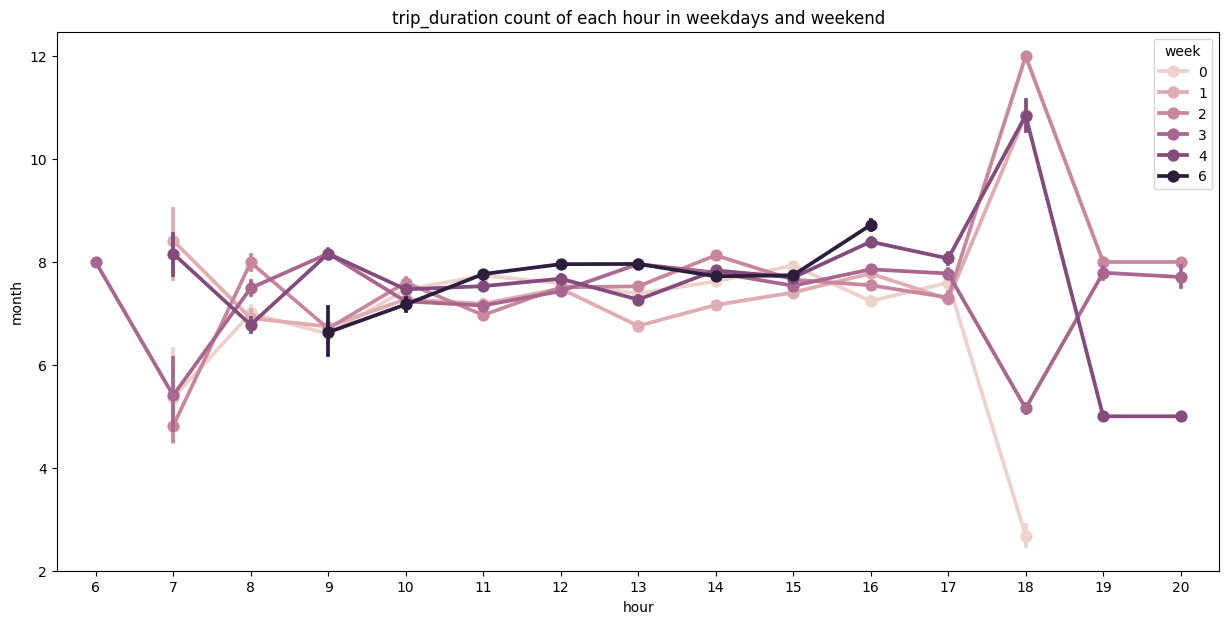

In [ ]:
#Set the figure size
plt.figure(figsize=(15,7))

#Create Point plot
sns.pointplot(x = new_df['hour'],y = new_df['month'],hue = new_df['week'])

#Set the title
plt.title('Month count of each hour in weekdays')

#Show the chart
plt.show()

### Find The Correlation

In [ ]:
## Check the correlation for all numerical data
data = new_df.select_dtypes(include=['float', 'int'])
data = data.corr().round(2)
data

,Quantity,UnitPrice,year,month,quarter,days,week,hour,minute
Quantity,1.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.01,-0.00
UnitPrice,-0.00,1.00,-0.00,-0.00,-0.00,-0.00,-0.01,0.00,0.00
year,0.00,-0.00,1.00,-0.37,-0.30,0.16,-0.01,-0.01,-0.02
month,-0.00,-0.00,-0.37,1.00,0.97,-0.12,0.04,0.03,0.02
quarter,-0.00,-0.00,-0.30,0.97,1.00,-0.09,0.03,0.03,0.01
days,-0.00,-0.00,0.16,-0.12,-0.09,1.00,-0.02,-0.00,-0.01
week,-0.00,-0.01,-0.01,0.04,0.03,-0.02,1.00,-0.03,-0.01
hour,-0.01,0.00,-0.01,0.03,0.03,-0.00,-0.03,1.00,-0.11
minute,-0.00,0.00,-0.02,0.02,0.01,-0.01,-0.01,-0.11,1.00


In [ ]:
data = new_df[['Quantity', 'UnitPrice', 'year', 'month', 'days', 'week', 'hour']]

### Chart-14
* Heatmap- Correlations

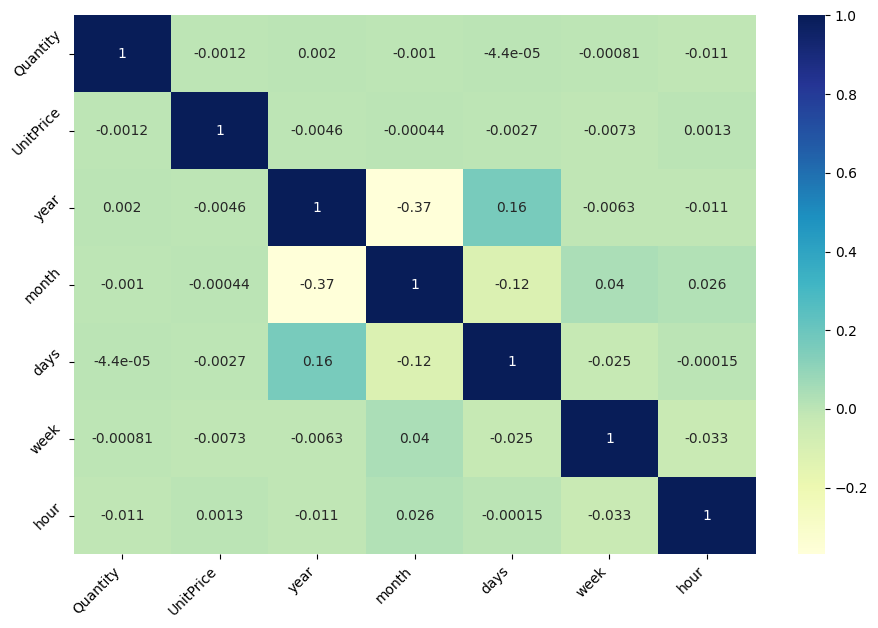

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(11, 7))

dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True) # Multivariant analysis

plt.xticks(rotation=45, ha='right')

plt.yticks(rotation=45, ha='right')

# displaying heatmap
plt.show()

1. Why did you pick the specific chart?
* By above haetmap it visulaize that pickup_month and dropp off month is 100% correlated.Along with pickup hour ,dropoff hour,pickup weekday and dropoff week day,trip duration and trip duration in minute are highly correlated.

A correlation heatmap visually represents the strength and direction of relationships between variables. Positive correlations are typically shown in one color (e.g., blue), while negative correlations are shown in another (e.g., red). The intensity of the color indicates the strength of the correlation.

* Identify Strong Relationships
* Detect Multicollinearity
* Simplify Complex Data
* Highlight Anomalies
* Easy Interpretation

2. What is/are the insight(s) found from the chart?

* High Positive Correlation: Variables that are strongly positively correlated (e.g., a correlation coefficient close to +1) indicate that as one variable increases, the other tends to increase as well. This might suggest a direct relationship.
* High Negative Correlation: Variables with a strong negative correlation (e.g., close to -1) indicate that as one variable increases, the other tends to decrease. This could indicate an inverse relationship.
* Low or No Correlation: Variables with correlations near 0 have little to no linear relationship, suggesting they might be independent of each other.
* Multicollinearity: Identifying pairs of variables that are highly correlated with each other might indicate multicollinearity, which can affect model performance.

### Chart-15
* paiplot

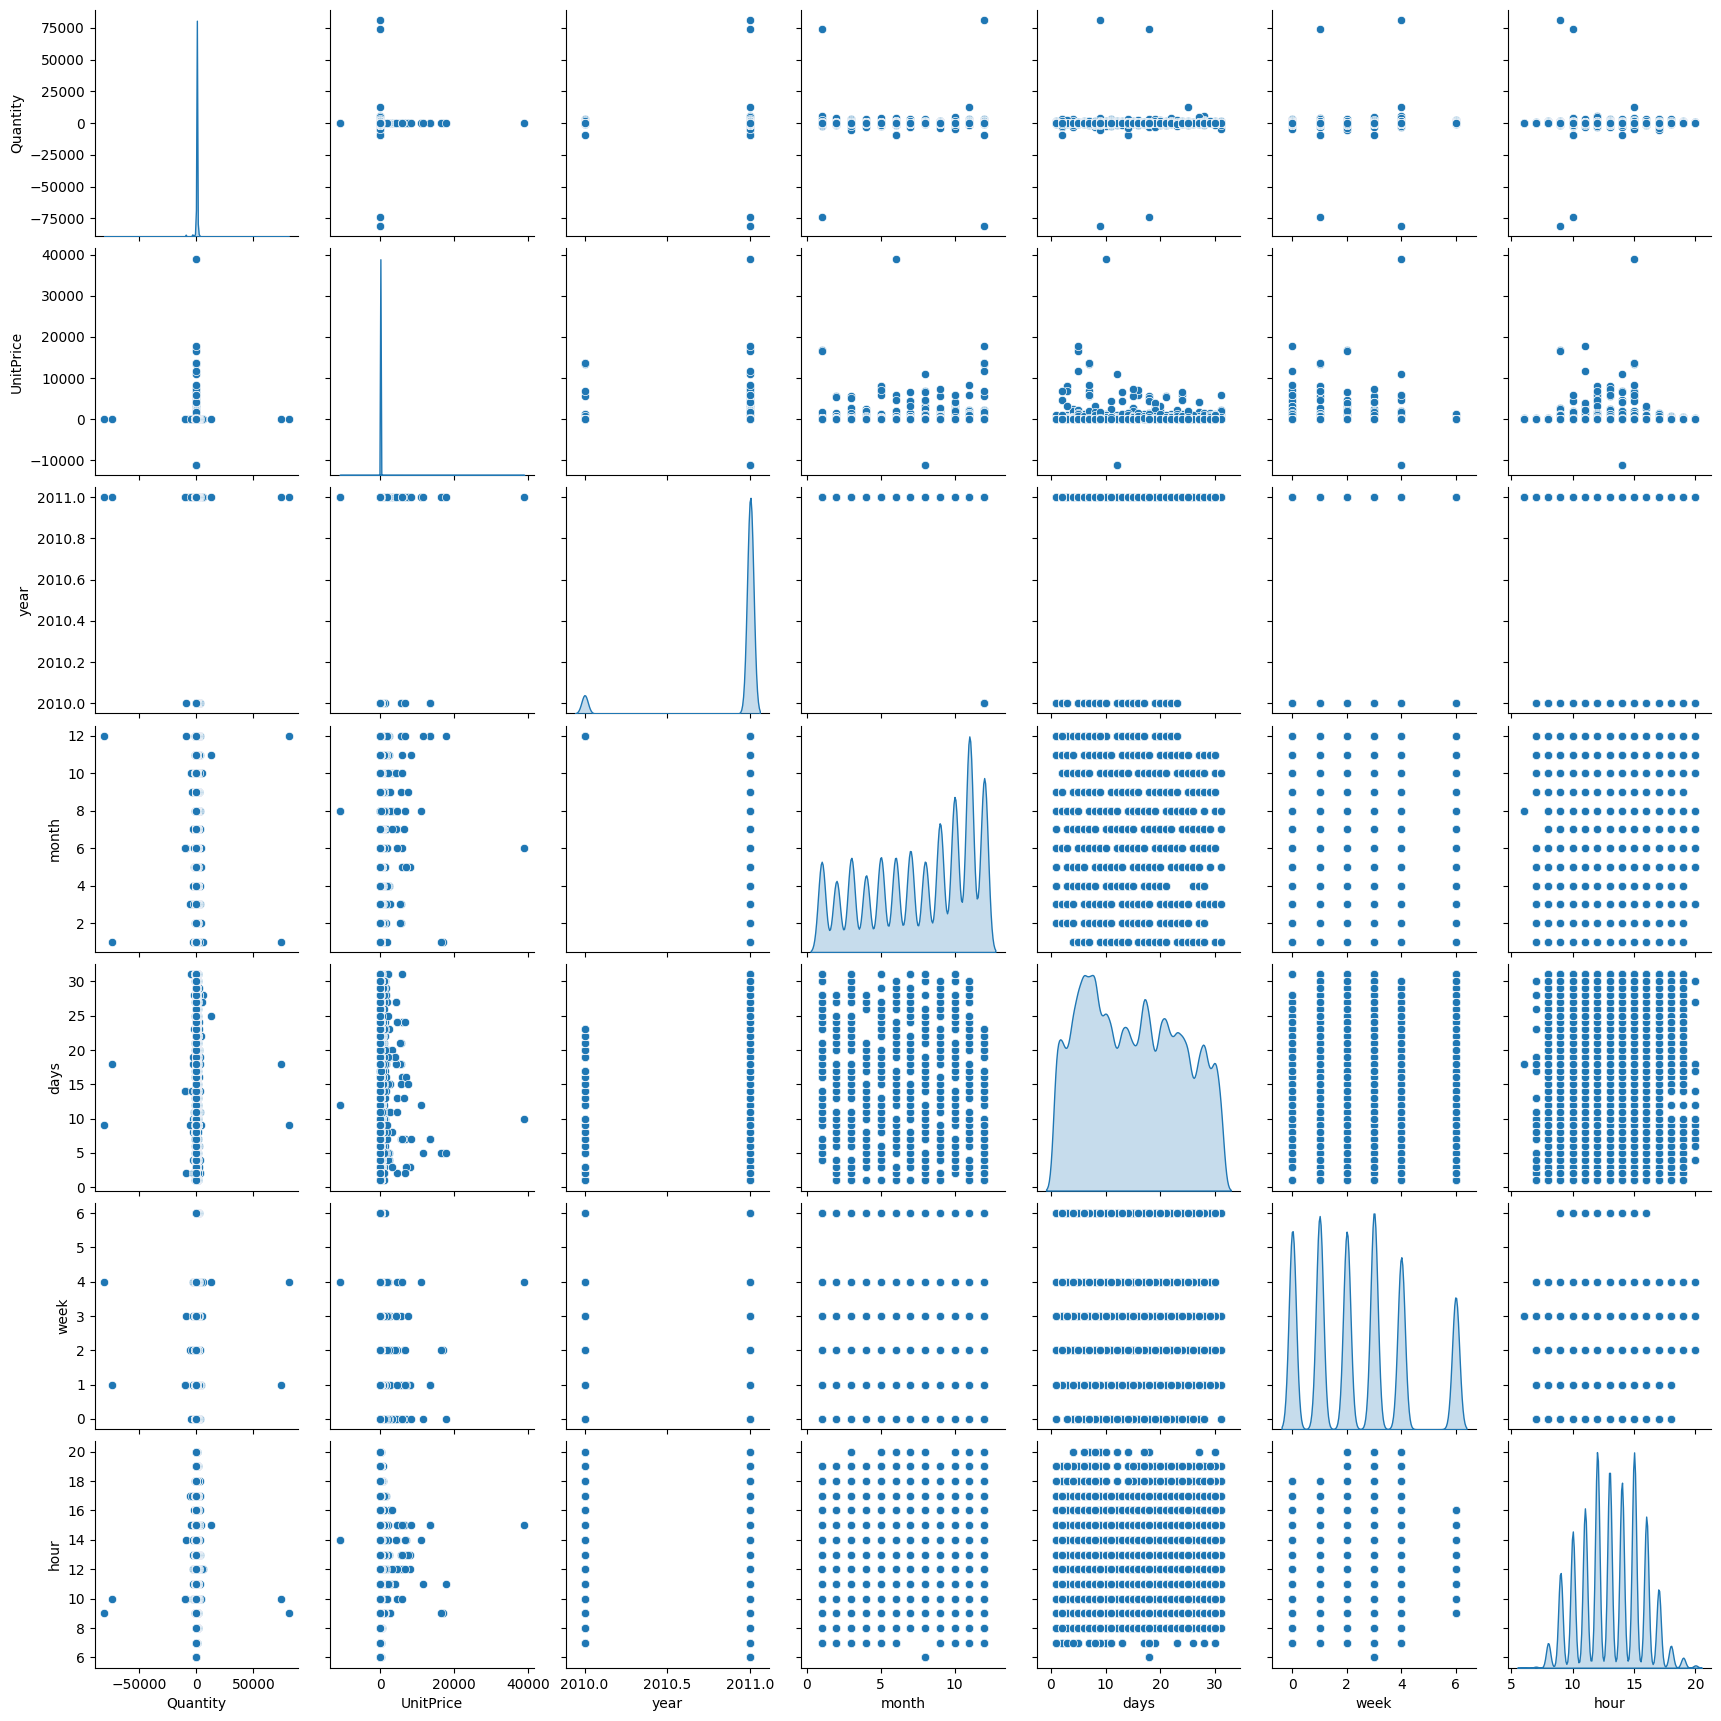

In [ ]:
# Pair Plot visualization code
sns.pairplot(data, diag_kind="kde", palette='YlGn', height=2.5)
plt.show()

1. Why did you pick the specific chart?

* Identify Relationships: Pair plots help in identifying relationships (linear or non-linear) between different features. By plotting every feature against every other feature, you can quickly see if there’s a strong correlation.

* Detect Outliers: They are useful for detecting outliers, which might skew your analysis or model training. Outliers often stand out clearly in a pair plot.

* Understand Data Distribution: The diagonal of a pair plot often shows the distribution of each variable, helping you understand the data's spread and any skewness.

* Multivariate Analysis: Pair plots provide a compact view of the entire dataset, allowing you to assess interactions between variables in a multivariate context, which is particularly useful in exploratory data analysis (EDA).


2. What is/are the insight(s) found from the chart?

* Linear Relationship: If two variables show a straight-line pattern, it suggests a linear relationship. For example, if the scatterplot between two variables forms a line from the bottom left to the top right, there is a positive linear correlation.

* Non-linear Relationship: Curved patterns may indicate non-linear relationships. For instance, a parabolic shape suggests a quadratic relationship between the variables.

* No Relationship: A random scatter of points with no discernible pattern indicates no significant relationship between the variables.

* Outliers: Points that are distant from the rest of the data in any of the scatterplots may be outliers. These can affect statistical analyses and model performance, so identifying them is crucial.

* Skewness: The diagonal plots (usually histograms or kernel density estimates) show the distribution of individual variables. A skewed distribution might suggest the need for transformation, such as logarithmic scaling.

* Bimodal Distribution: If a diagonal plot shows two peaks, it might indicate a bimodal distribution, which could suggest the presence of two different populations within the data.

## **Feature Engineering & Data Pre-processing**

##### Feature Engineering

###### we will add all text based or categorical columns

In [ ]:
# We will add all categorical and text based columns
new_df['text'] = new_df['Country'] + '' + new_df['Description']

In [ ]:
#Find the only text columns
data = new_df['text']

In [ ]:
#Check the data
data[0]

'United KingdomWHITE HANGING HEART T-LIGHT HOLDER'

In [ ]:
#Export the dataset
data.to_csv('data_text.csv')

In [ ]:
#Import the data set
df = pd.read_csv('/content/drive/MyDrive/data_text.csv')

In [ ]:
df.head()

,Unnamed: 0,text
0,0,United KingdomWHITE HANGING HEART T-LIGHT HOLDER
1,1,United KingdomWHITE METAL LANTERN
2,2,United KingdomCREAM CUPID HEARTS COAT HANGER
3,3,United KingdomKNITTED UNION FLAG HOT WATER BOTTLE
4,4,United KingdomRED WOOLLY HOTTIE WHITE HEART.


#### **Text cleaning**

In [ ]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
import string,time
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
# Data Clean example = sweet to sweets , or go --> goes same world convert only one world using this method
port_stem = PorterStemmer()

In [ ]:
# Data Cleaning using Regular expression
def clean_text(text):
  text = re.sub(r'@\w+|https?://\S+|[^A-Za-z0-9\s]', '', text) #Remove URL and Email_id
  text = re.sub(r'[\r\n]+', ' ', text) #Remove special char
  text = re.sub(r'[^a-zA-Z]', ' ', text) # Remove any another char
  clean = re.compile('<.*?>') #remove HTML tag
  text = clean.sub(r'', text)

  emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)

  text = emoji_pattern.sub(r'', text) # Remove Emoji

  text = text.lower() # Set the all char in lower
  text = text.split() # Split the char
  text = [port_stem.stem(word) for word in text if not word in stopwords.words('english')] #Remove stop word

  text = ' '.join(text) # Join the char

  return text

In [ ]:
#Apply the function
df['text'] = df['text'].apply(clean_text)

In [ ]:
#Remove Punctuation
panch_word = string.punctuation
def remove_punch(text):
  for punch in panch_word:
    text = text.replace(punch,'')
  return text


In [ ]:
#Apply Puctuation method
df['text'] = df['text'].apply(remove_punch)

In [ ]:
#Check the top 5 data after clean the data
df['text'].head()

,text
0,unit kingdomwhit hang heart tlight holder
1,unit kingdomwhit metal lantern
2,unit kingdomcream cupid heart coat hanger
3,unit kingdomknit union flag hot water bottl
4,unit kingdomr woolli hotti white heart


In [ ]:
#Check the below 5 data after clean the data
df['text'].tail()

,text
536636,francepack spaceboy napkin
536637,francechildren apron dolli girl
536638,francechildren cutleri dolli girl
536639,francechildren cutleri circu parad
536640,francebak set piec retrospot


In [ ]:
#Check Rendom 10 data after clean the data
df['text'].sample(10)

,text
301915,unit kingdomscandinavian paisley picnic bag
7461,unit kingdomgin tonic diet metal sign
217276,unit kingdomlarg circular mirror mobil
340758,unit kingdomrex cashcarri jumbo shopper
132611,unit kingdomblu polkadot egg cup
509665,unit kingdomcupboard drawer campagn
47441,germanyblu polkadot cup
364231,unit kingdomdolli girl mini backpack
367770,unit kingdomgingerbread man cooki cutter
271814,germani tradit spin top


In [ ]:
#Check the shape
df.shape

(536641, 2)

In [ ]:
x = df['text']
x.shape

(536641,)

In [ ]:
x.to_csv('clean_data.csv')

In [15]:
data = pd.read_csv('/content/drive/MyDrive/clean_data.csv')

In [16]:
y = data['text'].head(5000)

## **Using TF-IDF**
Term frequency-inverse document frequency is a text vectorizer that transforms the text into a usable vector.

In [17]:
#Initialize the Vectorization
vectorizer = TfidfVectorizer()

#Transfor the text to vector form
X = vectorizer.fit_transform(y)

In [ ]:
#Check the feature
vectorizer.get_feature_names_out()

array(['abc', 'acapulco', 'account', ..., 'xma', 'yellow', 'zinc'],
      dtype=object)

In [6]:
#check the shape
X.shape

(5000, 1530)

In [ ]:
#convert the array format
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### **Applying PCA-Principal Component Analysis to reduce dimensions.**

In [ ]:
transformer = PCA()
transformer.fit(X.toarray())

PCA()

#### Cumulative Explained Variance

Text(0, 0.5, 'cumulative explained variance')

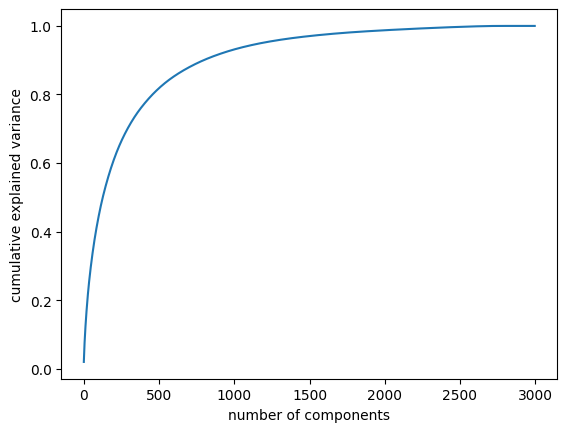

In [ ]:
#explained var v/s comp
plt.plot(np.cumsum(transformer.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [18]:
#choosing right dim from plot, this might take a while, for ready ans use n_components = 2000
transformer = PCA(n_components=500)
transformer.fit(X.toarray())
X_transformed = transformer.transform(X.toarray())
X_transformed.shape

(5000, 500)

In [20]:
# vectorizing the test and train
X_vectorized = vectorizer.transform(y)

In [21]:
#applying pca
X= transformer.transform(X_vectorized.toarray())

### **Check number of cluster using Elbow method**

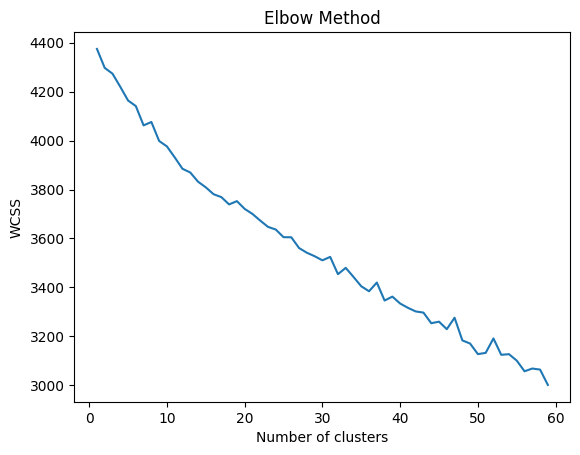

In [22]:
# We will plot the graph to get the no. of clusters
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 60):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=200, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


plt.plot(range(1, 60), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### **Hierechical Clustering**

In [11]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, silhouette_samples

##### **dendogram**

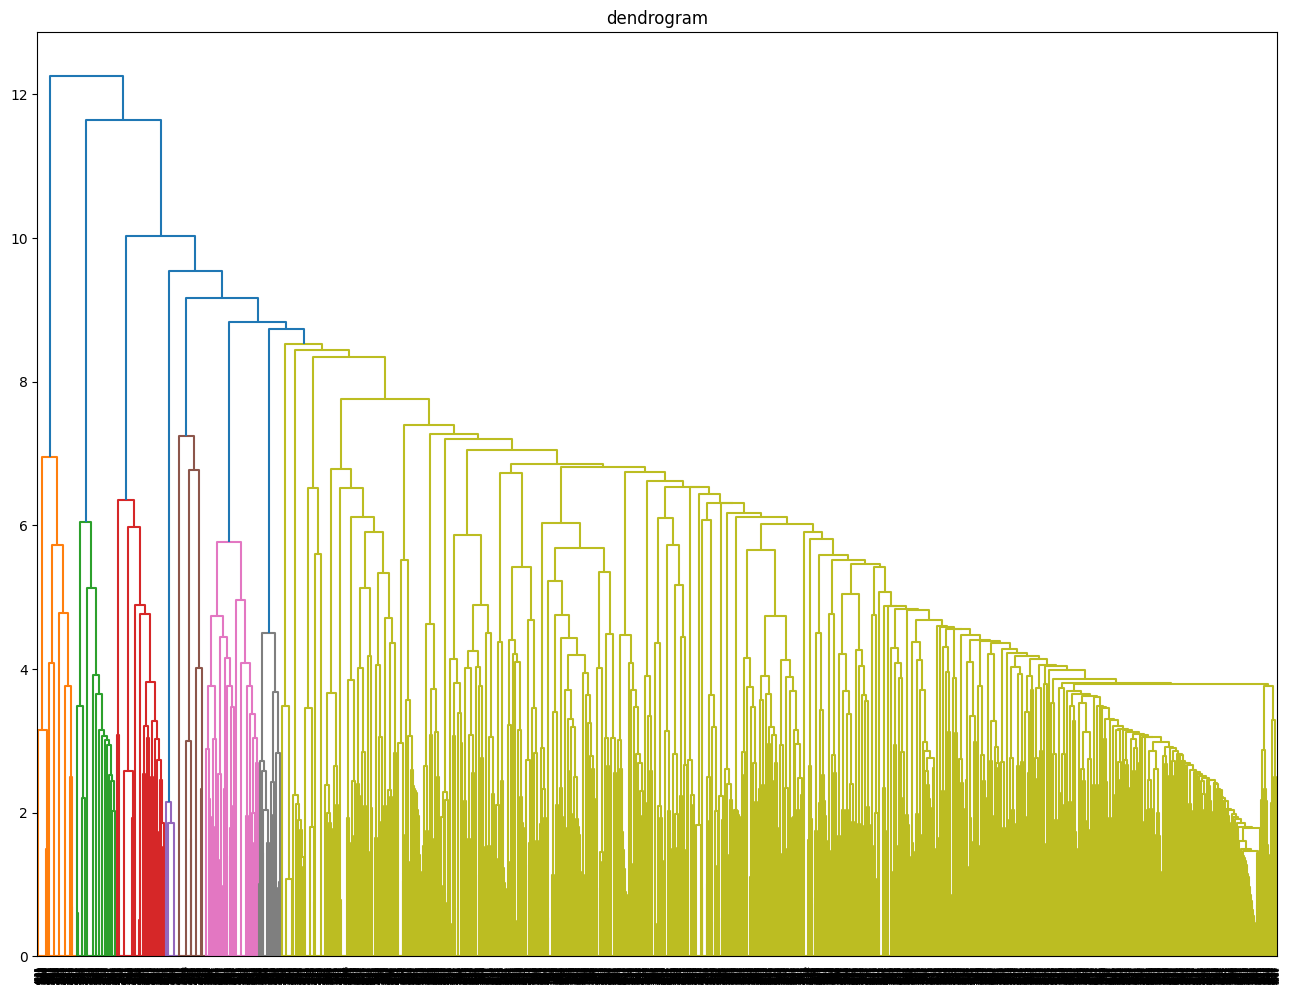

In [12]:
plt.figure(figsize=(16,12))
plt.title('dendrogram')
dend = dendrogram(linkage(X, method='ward'))

### **Agglomerative Clustering**

In [32]:
cluster = AgglomerativeClustering(n_clusters=355)
labels_ = cluster.fit_predict(X)
labels_

array([344, 264, 337, ..., 212,  54, 320])

In [33]:
silhouette_score(X, labels_)

0.5060924775995677

In [35]:
# Check Silhouette Score for each cluster
silhouette_score_ = [  ]
range_n_clusters = [i for i in range(2,55)]
for n_clusters in range_n_clusters:
    clusterer = AgglomerativeClustering(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    #centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    silhouette_score_.append([int(n_clusters) , round(score , 3)])
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.040354360591428454
For n_clusters = 3, silhouette score is 0.04330843441523965
For n_clusters = 4, silhouette score is 0.037013746487832046
For n_clusters = 5, silhouette score is 0.041607650564954426
For n_clusters = 6, silhouette score is 0.046972869591961286
For n_clusters = 7, silhouette score is 0.04910215862956731
For n_clusters = 8, silhouette score is 0.05116236068642098
For n_clusters = 9, silhouette score is 0.05518909423149106
For n_clusters = 10, silhouette score is 0.06017802013737096
For n_clusters = 11, silhouette score is 0.06400545112863736
For n_clusters = 12, silhouette score is 0.06655501239355179
For n_clusters = 13, silhouette score is 0.061113858073417966
For n_clusters = 14, silhouette score is 0.06439336509590997
For n_clusters = 15, silhouette score is 0.0678081111465194
For n_clusters = 16, silhouette score is 0.07119067173254444
For n_clusters = 17, silhouette score is 0.07308345709900001
For n_clusters = 18, silhoue

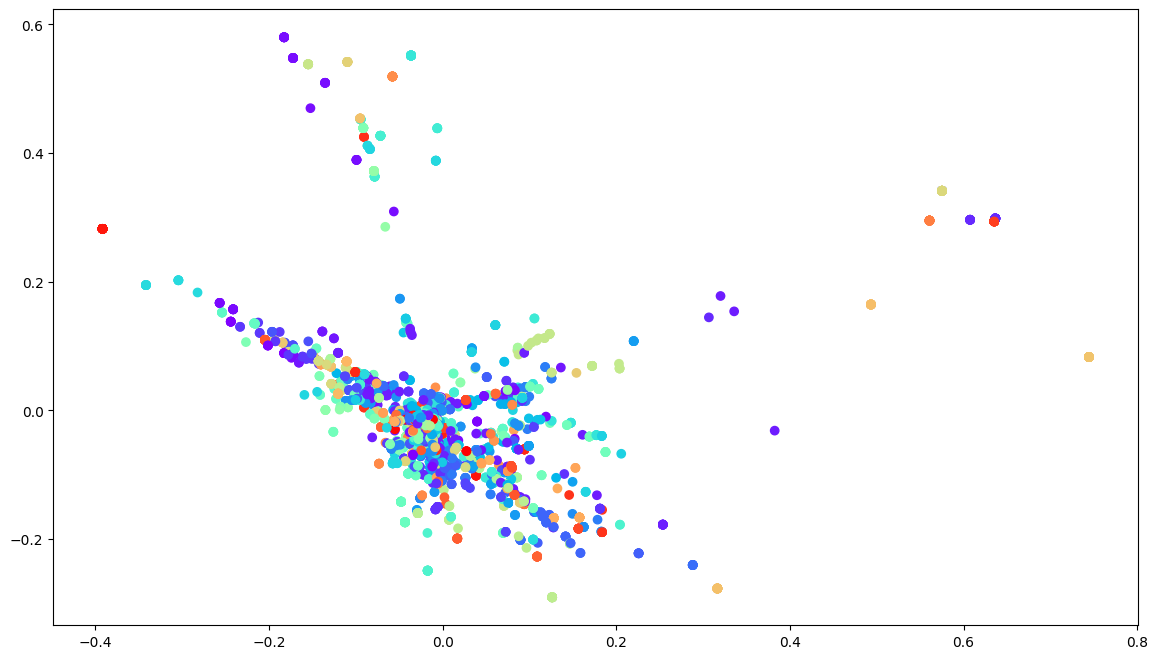

In [37]:
plt.figure(figsize=(14,8))
plt.scatter(X[:,0],X[:,1],c=cluster.labels_, cmap='rainbow')
plt.show()

### **KMeans Clustering**

In [38]:
cluster = KMeans(n_clusters=395, random_state=0)
y_pred = cluster.fit_predict(X)

silhouette_score(X, y_pred)

0.5267681096957535

In [39]:
silhouette_samples(X, y_pred)

array([1.        , 0.91525094, 0.99999998, ..., 0.61467284, 1.        ,
       1.        ])

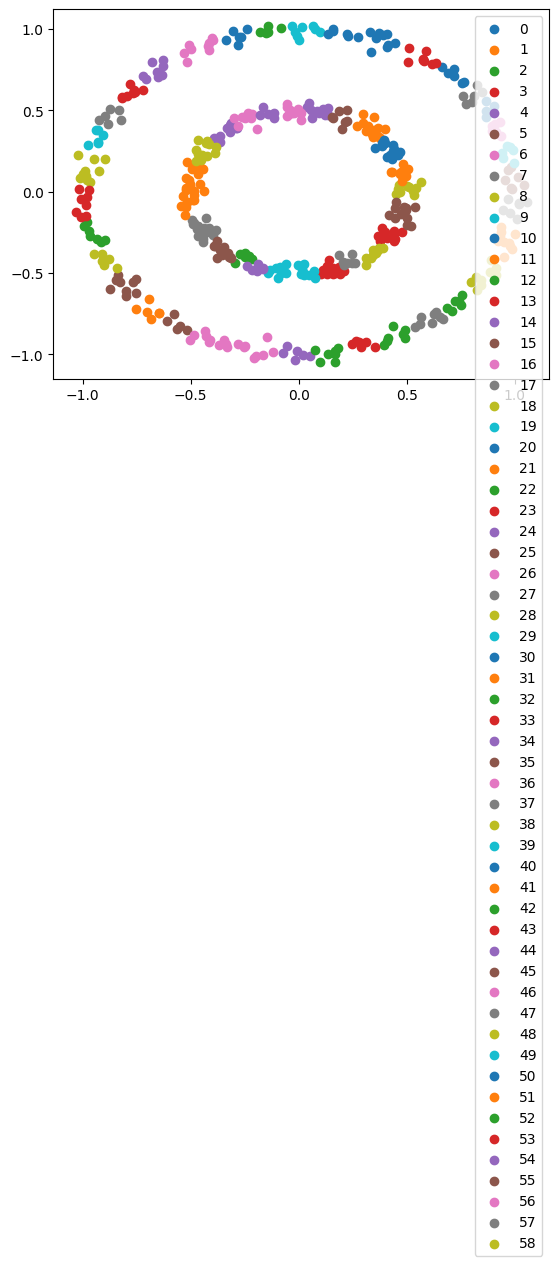

In [45]:
#predict the labels of clusters.
label = kmeans.fit_predict(X)

#Getting unique labels
u_labels = np.unique(label)

#plotting the results:
for i in u_labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
plt.rcParams["figure.figsize"] = (20,8)
plt.legend()
plt.show()

### **DBSCAN**

In [40]:
from sklearn.datasets import make_circles
from sklearn.cluster import DBSCAN

In [41]:
# Create a concentric circle dataset
X, _ = make_circles(n_samples=500, factor=.5, noise=.03, random_state=4)

# Apply DBSCAN to the dataset
dbscan = DBSCAN(eps=0.1, min_samples=5)
clusters = dbscan.fit_predict(X)

In [42]:
dbscan = DBSCAN(eps=0.1, min_samples=5)
labels_ = dbscan.fit(X)
labels_

DBSCAN(eps=0.1)

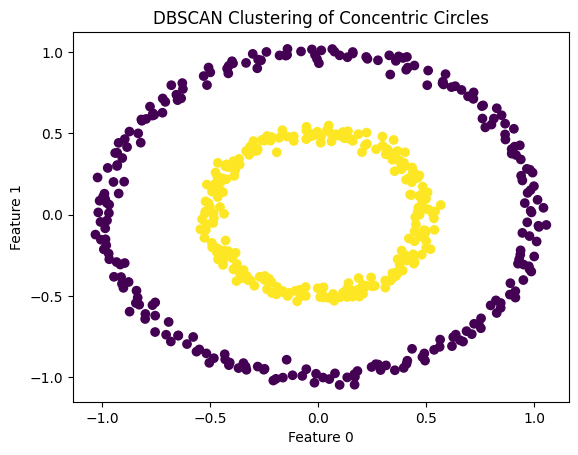

In [43]:
# Plotting
plt.scatter(X[:, 0], X[:, 1], c=dbscan.labels_, cmap='viridis', marker='o')
plt.title("DBSCAN Clustering of Concentric Circles")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

# **Conclusion-**


## **1- Data Overview**

**1- Data Overview**
  * We have 533645 rows and 8 columns provided in the data.

  * In the dataset we have 2 object columns and 6 integer column as year.

**2- Checking the null values**

InvoiceNo : Count : 0 : Percentage : 0.0

StockCode : Count : 0 : Percentage : 0.0

Description : Count : 0 : Percentage : 0.0

Quantity : Count : 0 : Percentage : 0.0

InvoiceDate : Count : 0 : Percentage : 0.0

UnitPrice : Count : 0 : Percentage : 0.0

CustomerID : Count : 135037 : Percentage : 25.16

Country : Count : 0 : Percentage : 0.0

  * Fist we have 135037 null values in customerid column.We have almost 25% null values in this column so we can not use this column in model training but we can use it in EDA.

**3- Check Duplicate values in the dataset**

  * we do not have any Duplicate values in the dataset.


---


Number of Unique : Country : 38

Number of Unique : Description : 4224

Number of Unique : Quantity : 722

Number of Unique : UnitPrice : 1630

Number of Unique : year : 2

Number of Unique : month : 12

Number of Unique : month_name : 12

Number of Unique : week_name : 6

Number of Unique : quarter : 4

Number of Unique : days : 31

Number of Unique : week : 6

Number of Unique : hour : 15

Number of Unique : minute : 60


## **2- Data pre-processing**

**1- Feature Engineering**
  * For train the model we use description column and Country column.

**2- We performe Text cleaning as our next step**
  * convert all words in lowercase.

**3- We performe Stemming as our next step**
  * We remove all stopwords.
  * Also use stemming function.

**4- We performe TF-IDF vectorizer**
  * Term frequency-inverse document frequency is a text vectorizer that transforms the text into a usable vector.

**5- Applying PCA-Principal Component Analysis to reduce dimensions.**
  * We will use 2000 components



---


## **3- Applying models**

**1- Find the value of clusters**
  * WE use Elbow method for finding k values.
  * Also use Silhouette Score for best score.
  * Also use Dendogram for finding the value of clusters.
  
**2- Use Agglomerative Clustering**

**3- Use KMeans Clustering**

**4-Use DSCAN Clustering**

**Hurrah! I have successfully completed Machine Learning Capstone Project !!!**